In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [77]:
df =  pd.read_excel('C:/Users/HP PC/Untitled Folder 1/timeseries.xslx')
df

,timestamp,value
0,1309738501,0.080120
1,1309742101,0.088765
2,1309745701,0.087295
3,1309749301,0.092387
4,1309752901,0.075675
...,...,...
1566,1315390501,0.054275
1567,1315394101,0.070650
1568,1315397701,0.056339
1569,1315401301,0.050782


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1571 non-null   int64  
 1   value      1571 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 24.7 KB


In [79]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1571 non-null   datetime64[ns]
 1   value      1571 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.7 KB


In [80]:
df

,timestamp,value
0,1970-01-01 00:00:01.309738501,0.080120
1,1970-01-01 00:00:01.309742101,0.088765
2,1970-01-01 00:00:01.309745701,0.087295
3,1970-01-01 00:00:01.309749301,0.092387
4,1970-01-01 00:00:01.309752901,0.075675
...,...,...
1566,1970-01-01 00:00:01.315390501,0.054275
1567,1970-01-01 00:00:01.315394101,0.070650
1568,1970-01-01 00:00:01.315397701,0.056339
1569,1970-01-01 00:00:01.315401301,0.050782


In [81]:
df.head()

,timestamp,value
0,1970-01-01 00:00:01.309738501,0.080120
1,1970-01-01 00:00:01.309742101,0.088765
2,1970-01-01 00:00:01.309745701,0.087295
3,1970-01-01 00:00:01.309749301,0.092387
4,1970-01-01 00:00:01.309752901,0.075675


In [82]:
df.tail()

,timestamp,value
1566,1970-01-01 00:00:01.315390501,0.054275
1567,1970-01-01 00:00:01.315394101,0.070650
1568,1970-01-01 00:00:01.315397701,0.056339
1569,1970-01-01 00:00:01.315401301,0.050782
1570,1970-01-01 00:00:01.315404901,0.056232


In [83]:
df.describe()

,value
count,1571.000000
mean,0.087070
std,0.131832
min,0.023884
25%,0.054334
50%,0.073453
75%,0.096189
max,3.126852


<AxesSubplot:>

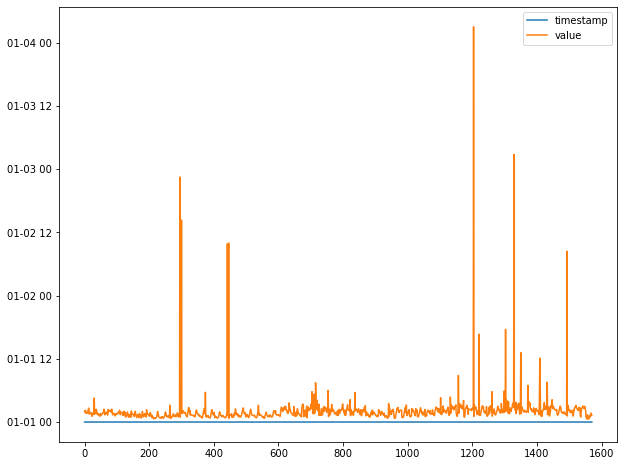

In [84]:
df.plot()

In [85]:
fig = px.line(df.reset_index(), x = 'timestamp', y = 'value', title = 'TIME SERIES ANALYSIS')
              
fig.update_xaxes(rangeslider_visible = True,)
fig.show()          

In [107]:
model = IsolationForest(contamination = 0.04)
model.fit(df[['value']])

IsolationForest(contamination=0.04)

In [101]:
df['outliers'] = pd.Series(model.predict(df[['value']])).apply(lambda x: 'yes' if (x == -1) else 'no')

In [102]:
df.query('outliers == "yes"')       #dataset showing outliers for anomalies
                                    #outliers = anomalies

,timestamp,value,outliers
30,1970-01-01 00:00:01.309846501,0.190325,yes
168,1970-01-01 00:00:01.310343301,0.033881,yes
175,1970-01-01 00:00:01.310372101,0.031553,yes
176,1970-01-01 00:00:01.310375701,0.033533,yes
211,1970-01-01 00:00:01.310505301,0.033116,yes
...,...,...,...
1558,1970-01-01 00:00:01.315361701,0.024925,yes
1559,1970-01-01 00:00:01.315365301,0.032984,yes
1560,1970-01-01 00:00:01.315368901,0.025836,yes
1561,1970-01-01 00:00:01.315372501,0.029218,yes


In [103]:
df

,timestamp,value,outliers
0,1970-01-01 00:00:01.309738501,0.080120,no
1,1970-01-01 00:00:01.309742101,0.088765,no
2,1970-01-01 00:00:01.309745701,0.087295,no
3,1970-01-01 00:00:01.309749301,0.092387,no
4,1970-01-01 00:00:01.309752901,0.075675,no
...,...,...,...
1566,1970-01-01 00:00:01.315390501,0.054275,no
1567,1970-01-01 00:00:01.315394101,0.070650,no
1568,1970-01-01 00:00:01.315397701,0.056339,no
1569,1970-01-01 00:00:01.315401301,0.050782,no


In [134]:
fig = px.scatter(df.reset_index(), x = 'timestamp', y = 'value',color = 'outliers', title = 'TIMESERIES ANALYSIS')

fig.update_xaxes(rangeslider_visible = True,)
fig.show()

In [113]:
model = IsolationForest()
model.fit(df[['value']])

IsolationForest()

In [116]:
score = model.decision_function(df[['value']])

In [117]:
score

array([0.08781832, 0.07502699, 0.07938044, ..., 0.09570428, 0.07601386,
       0.09491869])

(array([   7.,    4.,    5.,   10.,    8.,   14.,   31.,   61.,  193.,
        1238.]),
 array([-0.39861496, -0.34841013, -0.2982053 , -0.24800047, -0.19779564,
        -0.14759081, -0.09738598, -0.04718115,  0.00302368,  0.0532285 ,
         0.10343333]),
 <BarContainer object of 10 artists>)

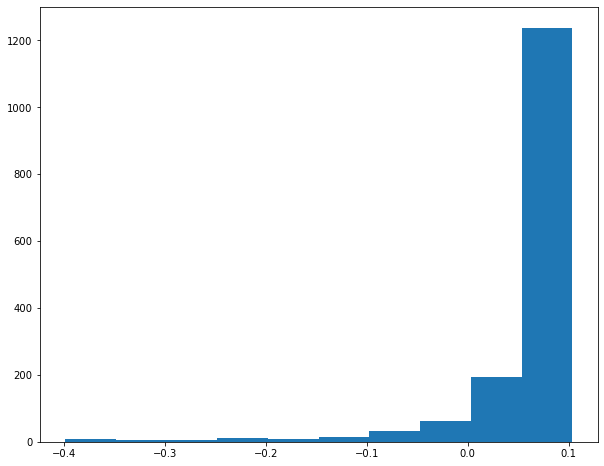

In [119]:
plt.hist(score)

In [125]:
df['scores'] = score

In [126]:
df

,timestamp,value,outliers,score,scores
0,1970-01-01 00:00:01.309738501,0.080120,no,0.087818,0.087818
1,1970-01-01 00:00:01.309742101,0.088765,no,0.075027,0.075027
2,1970-01-01 00:00:01.309745701,0.087295,no,0.079380,0.079380
3,1970-01-01 00:00:01.309749301,0.092387,no,0.084568,0.084568
4,1970-01-01 00:00:01.309752901,0.075675,no,0.093996,0.093996
...,...,...,...,...,...
1566,1970-01-01 00:00:01.315390501,0.054275,no,0.082081,0.082081
1567,1970-01-01 00:00:01.315394101,0.070650,no,0.089473,0.089473
1568,1970-01-01 00:00:01.315397701,0.056339,no,0.095704,0.095704
1569,1970-01-01 00:00:01.315401301,0.050782,no,0.076014,0.076014


In [127]:
df.query('scores<-0.20')

,timestamp,value,outliers,score,scores
295,1970-01-01 00:00:01.310807701,1.937843,yes,-0.390143,-0.390143
300,1970-01-01 00:00:01.310825701,1.597419,yes,-0.374030,-0.374030
374,1970-01-01 00:00:01.311092101,0.235019,yes,-0.228098,-0.228098
442,1970-01-01 00:00:01.311336901,1.408696,yes,-0.365204,-0.365204
446,1970-01-01 00:00:01.311351301,1.415511,yes,-0.365204,-0.365204
704,1970-01-01 00:00:01.312287301,0.239967,yes,-0.233538,-0.233538
710,1970-01-01 00:00:01.312308901,0.220064,yes,-0.219285,-0.219285
715,1970-01-01 00:00:01.312326901,0.311372,yes,-0.274336,-0.274336
716,1970-01-01 00:00:01.312330501,0.234289,yes,-0.227114,-0.227114
754,1970-01-01 00:00:01.312467301,0.250437,yes,-0.239017,-0.239017
